## Deskripsi Proyek

Kamu bekerja sebagai seorang analyst untuk Zuber, sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago. Tugasmu adalah untuk menemukan pola pada informasi yang tersedia. Kamu ingin memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.

Dengan menggunakan database, kamu akan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan. 

/datasets/project_sql_result_01.csv - memuat data berikut ini:
- company_name: nama perusahaan taksi
- trips_amount: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

/datasets/project_sql_result_04.csv - memuat data berikut ini:
- dropoff_location_name: nama wilayah di Chicago tempat perjalanan berakhir
- average_trips: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

/datasets/project_sql_result_07.csv — hasil dari kueri terakhir. File ini memuat data perjalanan dari Loop ke Bandara Internasional O'Hare. Ingat, berikut adalah nilai kolom-kolom yang ada di tabel ini:
- start_ts — tanggal dan waktu penjemputan
- weather_conditions — kondisi cuaca saat perjalanan dimulai
duration_seconds — durasi perjalanan dalam satuan detik

Untuk kedua dataset tersebut, sekarang Anda perlu untuk
- mengimpor kedua file
- mempelajari isi data
- memastikan tipe datanya sudah benar
- mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran
- membuat grafik: perusahaan taksi dan jumlah perjalanannya, 10 wilayah teratas berdasarkan jumlah pengantaran
menarik kesimpulan berdasarkan grafik yang telah dibuat dan menjelaskan hasilnya
- Uji hipotesis berikut:
"Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan." <p>
Jelaskan:
Bagaimana Anda merumuskan hipotesis nol dan hipotesis alternatif
Kriteria apa yang Anda gunakan untuk menguji hipotesis dan alasan Anda menggunakannya





## Load File

In [2]:
# Memuat library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np
from scipy import stats as st

In [3]:
# Memuat data project_sql_result_01 dan project_sql_result_04
try:
    company = pd.read_csv('/datasets/project_sql_result_01.csv')
    trips = pd.read_csv('/datasets/project_sql_result_04.csv')
    weather = pd.read_csv('/datasets/project_sql_result_07.csv')
except:
    company = pd.read_csv('project_sql_result_01.csv')
    trips = pd.read_csv('project_sql_result_04.csv')
    weather = pd.read_csv('project_sql_result_07.csv')

In [4]:
# Memeriksa file company
company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
# Mendapatkan informasi Company
company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
# Mendapatkan informasi Company
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<b>Mini Conclusion</b>

- company_name : Nama Perusahaan Taksi <b>is Ok! </b>

- trips_amount : jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017. <b>is Ok! </b>
    


In [7]:
# Memeriksa file Trips
trips.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [8]:
# Mendapatkan informasi Trips
trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [9]:
# Mendapatkan informasi Trips
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<b>Mini Conclusion</b>

- dropoff_location_name : Nama wilayah di Chicago tempat perjalanan berakhir <b>is Ok! </b>

- average_trips : jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017. <b>is Ok! </b>
    


In [10]:
# Memeriksa file Weather
weather.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [11]:
# Mendapatkan informasi Weather
weather.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [12]:
# Mendapatkan informasi Weather
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<b>Mini Conclusion</b>

- start_ts : Tanggal dan waktu penjemputan <b> Type data object, perlu diubah menjadi DateTime </b>

- weather_conditions : kondisi cuaca saat perjalanan dimulai <b>is Ok! </b>

- duration_seconds : durasi perjalanan dalam satuan detik <b>Type data Float, perlu diubah menjadi interger </b>
    


In [13]:
# Merubah type data kolom duration_seconds
weather['duration_seconds'] = weather['duration_seconds'].astype(int)

In [14]:
# Merubah type data kolom start_ts
weather['start_ts'] = pd.to_datetime(weather['start_ts'])

In [15]:
# Memastikan kembali type data duration_seconds pada dataframe Weather
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


## mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik dropoff dan Grafik

In [16]:
# Mendapatkan 10 Wilayah teratas yang sering kali menjadi titik dropoff
top_10_dropoff = trips.sort_values(by='average_trips', ascending=False).head(10)

In [17]:
top_10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


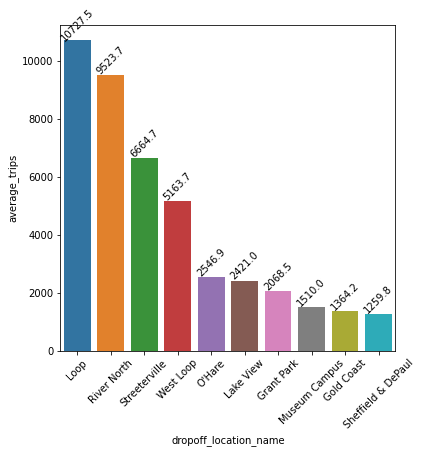

In [18]:
# Membuat bar diagram 10 Wilayah teratas yang sering kali menjadi titik dropoff
plt.figure(figsize=(6,6))
barplot = sns.barplot(data=top_10_dropoff, x='dropoff_location_name', y='average_trips')

for i in barplot.patches:
    barplot.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,15), rotation = 45,
                     textcoords = 'offset points')

plt.xticks(rotation = 45)
plt.show()

In [20]:
# Mendapatkan 10 perusahaan taksi dengan jumlah perjalanan tertinggi
top_10_company = company.sort_values(by='trips_amount', ascending=False).head(10)

In [22]:
# Memeriksa data 10 perusahaan taksi dengan jumlah perjalanan tertinggi
top_10_company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


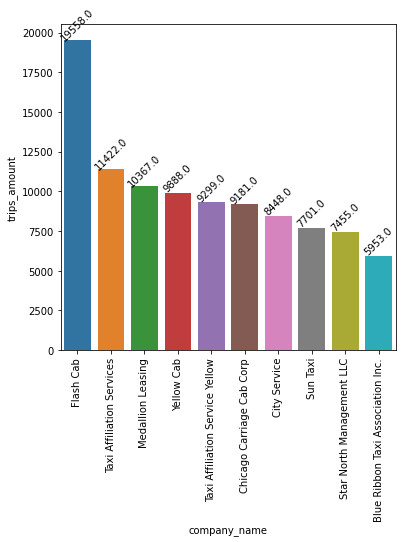

In [24]:
# Membuat bar diagram 10 perusahaan taksi dan jumlah pengantaraannya
plt.figure(figsize=(6,6))
barplot = sns.barplot(data=top_10_company, x='company_name', y='trips_amount')

for i in barplot.patches:
    barplot.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,15), rotation = 45,
                     textcoords = 'offset points')

plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
<b>Mini Conclusion.</b> <a class="tocSkip"></a>

Terdapat 3 Wilayah yang sering kali menjadi pemberhentian Taksi dan perbedaannya hingga 2 - 5 kali lipat dibanding wilayah lainnya yaitu:
- Loop
- River North
- Streeterville

    
Terdapat 1 perusahaan yang memiliki 2x lebih banyak perjalanan dibandung     

Insight
- Loop dan River North merupakan wilayah dengan jumlah trip terbanyak dibanding dengan wilayah lainnya,

    


## Hypothetical Testing

### Apakah Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan

Ho = Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari sabtu yang hujan adalah Tidak Berubah.

H1 = Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari sabtu yang hujan adalah Berubah.

In [20]:
# Mendapatkan data hari sabtu pada file Weather
weather['day_of_week'] = weather['start_ts'].dt.day_name()

In [24]:
# Memeriksa kembali file Weather
weather.head(10)

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410,Saturday
1,2017-11-25 14:00:00,Good,1920,Saturday
2,2017-11-25 12:00:00,Good,1543,Saturday
3,2017-11-04 10:00:00,Good,2512,Saturday
4,2017-11-11 07:00:00,Good,1440,Saturday
5,2017-11-11 04:00:00,Good,1320,Saturday
6,2017-11-04 16:00:00,Bad,2969,Saturday
7,2017-11-18 11:00:00,Good,2280,Saturday
8,2017-11-11 14:00:00,Good,2460,Saturday
9,2017-11-11 12:00:00,Good,2040,Saturday


In [33]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
 3   day_of_week         1068 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 33.5+ KB


In [25]:
# Memeriksa nilai unik dari kolom day_of_week
weather['day_of_week'].unique()

array(['Saturday'], dtype=object)

In [34]:
saturday_weather = weather.query("day_of_week == 'Saturday'")

In [35]:
bad_weather = saturday_weather.loc[saturday_weather['weather_conditions'] == 'Bad', 'duration_seconds'].dropna()
good_weather = saturday_weather.loc[saturday_weather['weather_conditions'] == 'Good', 'duration_seconds'].dropna()

In [36]:
# Memeriksa nilai yang hilang dan menghitung daftar dataset bad_weather
print(bad_weather.isna().sum())
print(bad_weather.count())

0
180


In [37]:
# Memeriksa nilai yang hilang dan menghitung daftar dataset good_weather
print(good_weather.isna().sum())
print(good_weather.count())

0
888


In [38]:
# menguji hypothesis dengan metode T-test rata-rata dua populasi setara
p_value = st.ttest_ind(bad_weather, good_weather, equal_var = False).pvalue

In [39]:
# tingkat signifikansi statistik kritis
alpha = 0.05

print(f'P-value: {p_value * 100:0.2f}%')
if p_value >= alpha:
    print('H0 Diterima')
elif p_value < alpha:
    print('H1 Diterima')

P-value: 0.00%
H1 Diterima


In [41]:
# Mendapatkan nilai rata-rata, varian dan standar deviasi dari masing-masing plan
saturday_weather.pivot_table(index='weather_conditions', values='duration_seconds', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,duration_seconds,duration_seconds,duration_seconds
weather_conditions,,,
Bad,2427.205556,520294.086002,721.314138
Good,1999.675676,576382.009690,759.198268


<div class="alert alert-block alert-info">
<b>Note.</b> <a class="tocSkip"></a>

Verdict :

- Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari sabtu yang hujan adalah Berubah.

Insight :
    
- rata-rata durasi perjalanan pada saat hujan cendrung memerlukan waktu lebih lama bila dibandingkan dengan cuaca yang baik.
    
    
    
</div>

##  Conclusion

<div class="alert alert-block alert-info">
<b>Conclusion.</b> <a class="tocSkip"></a>

Terdapat 3 Wilayah yang sering kali menjadi pemberhentian Taksi dan perbedaannya hingga 2 - 5 kali lipat dibanding wilayah lainnya yaitu:
- Loop
- River North
- Streeterville

Insight
- Loop dan River North merupakan wilayah dengan jumlah trip terbanyak dibanding dengan wilayah lainnya,
    
    
Verdict :

- Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari sabtu yang hujan adalah Berubah.

Insight :
    
- rata-rata durasi perjalanan pada saat hujan cendrung memerlukan waktu lebih lama bila dibandingkan dengan cuaca yang baik.
    

    
